In [78]:
import os
import sys
nb_dir = os.path.split(os.getcwd())[0]
sys.path.append(nb_dir)
from __future__ import division
import numpy as np
import matplotlib.pyplot as plt

from common import data_manager as dm, utils

In [79]:
ROOT = os.path.join(os.getcwd(), '../', '../')
pickle_file = os.path.join(ROOT, 'cache', 'telemetry_new.npy')

In [80]:
# Import new data
extractor = dm.PickleExtractor(pickle_file)
X = extractor.get_sequential_features
X = utils.pad_dataframe(X, 3, -121)
y = extractor.get_labels

n_samples, timesteps, m_features = X.shape
X = X.reshape(-1, timesteps*m_features)
print(X.shape)
print(set(y))

(4123, 21)
set([0, 1, 2, 3, 4, 5, 6, 7])


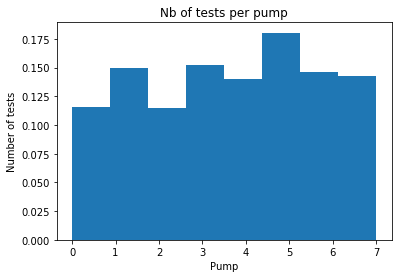

In [81]:
#plot the labels to see class balance
plt.hist(y, 8, normed=True)
plt.xlabel("Pump")
plt.ylabel("Number of tests")
plt.title("Nb of tests per pump")
plt.show()

### Visualise the Data

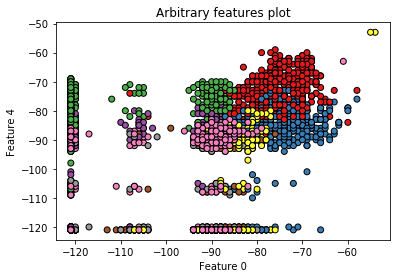

In [82]:
# choose random features
dim1 = 0
dim2 = 4

plt.scatter(X[:, dim1], X[:, dim2], c=y, cmap=plt.cm.Set1, edgecolor='k')
plt.xlabel('Feature %s' % dim1)
plt.ylabel('Feature %s' % dim2)
plt.title("Arbitrary features plot")
plt.show()

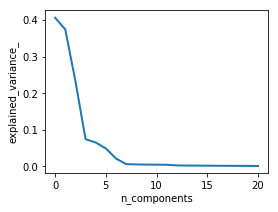

In [83]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA, KernelPCA

#X_std = StandardScaler().fit_transform(X)
X_std = MinMaxScaler().fit_transform(X)

#X_reduced = KernelPCA(n_components=3, kernel="cosine", gamma=1/63, degree=5).fit_transform(X_std)
pca = PCA().fit(X_std)
X_reduced = pca.transform(X_std)

plt.figure(1, figsize=(4, 3))
plt.clf()
#plt.axes([.2, .2, .7, .7])
plt.plot(pca.explained_variance_, linewidth=2)
plt.axis('tight')
plt.xlabel('n_components')
plt.ylabel('explained_variance_')
plt.show()

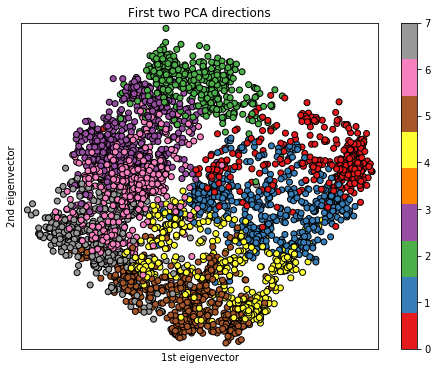

In [84]:
x_min, x_max = X_reduced[:, 0].min() - 0.05, X_reduced[:, 0].max() + 0.05
y_min, y_max = X_reduced[:, 1].min() - 0.05, X_reduced[:, 1].max() + 0.05

plt.figure(2, figsize=(8, 6))
plt.clf()

# Plot the training points
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y, cmap=plt.cm.Set1, edgecolor='k', label='color')
plt.xlabel('1st eigenvector')
plt.ylabel('2nd eigenvector')
plt.title("First two PCA directions")

plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())
plt.colorbar()
plt.show()

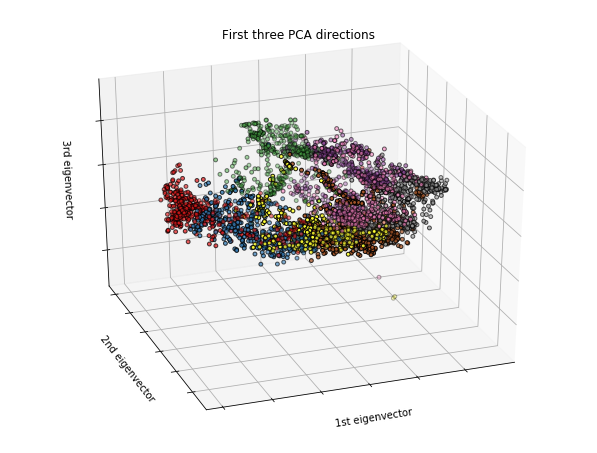

In [85]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(1, figsize=(8, 6))
ax = Axes3D(fig, elev=-150, azim=110)
ax.scatter(X_reduced[:, 0], X_reduced[:, 1], X_reduced[:, 2], c=y, cmap=plt.cm.Set1, edgecolor='k', s=15)
ax.set_title("First three PCA directions")
ax.set_xlabel("1st eigenvector")
ax.w_xaxis.set_ticklabels([])
ax.set_ylabel("2nd eigenvector")
ax.w_yaxis.set_ticklabels([])
ax.set_zlabel("3rd eigenvector")
ax.w_zaxis.set_ticklabels([])
plt.show()

In [47]:
from sklearn.manifold import TSNE

X_embedded = TSNE(n_components=3, n_iter=5000, perplexity=40).fit_transform(X)
print(X_embedded)

[[ -3.89829254 -50.13605499]
 [ -7.44787264  18.3106823 ]
 [ -8.67772388 -10.74143314]
 ..., 
 [ 32.24226761  44.29283524]
 [ 30.59706306  48.01771545]
 [ 22.23612213  46.98159027]]


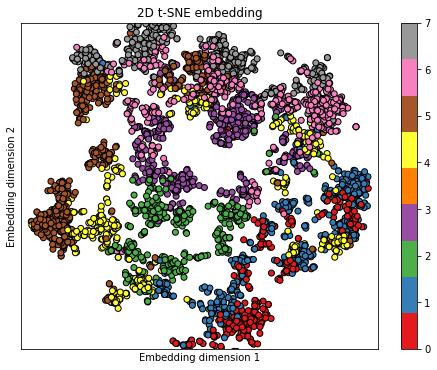

In [88]:
x_min, x_max = X_embedded[:, 0].min() - 1, X_embedded[:, 0].max() + 1
y_min, y_max = X_embedded[:, 1].min() - 1, X_embedded[:, 1].max() + 1

plt.figure(2, figsize=(8, 6))
plt.clf()

# Plot the training points
plt.scatter(X_embedded[:, 0], X_embedded[:, 2], c=y, cmap=plt.cm.Set1, edgecolor='k', label='color')
plt.xlabel('Embedding dimension 1')
plt.ylabel('Embedding dimension 2')
plt.title('2D t-SNE embedding')

plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())
plt.colorbar()
plt.show()

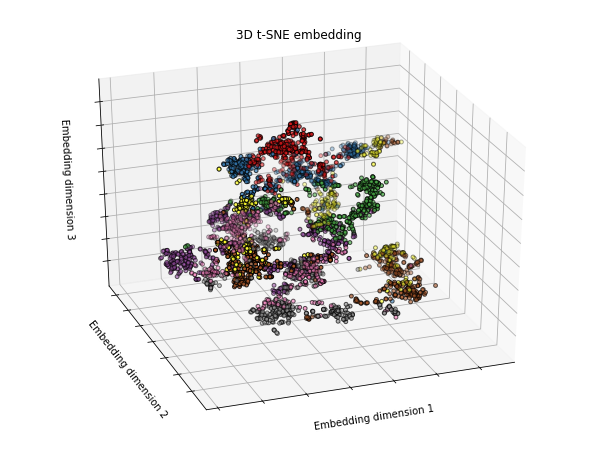

In [54]:
fig = plt.figure(1, figsize=(8, 6))
ax = Axes3D(fig, elev=-150, azim=110)
ax.scatter(X_embedded[:, 1], X_embedded[:, 0], X_embedded[:, 2], c=y,
           cmap=plt.cm.Set1, edgecolor='k', s=15)
ax.set_title('3D t-SNE embedding')
ax.set_xlabel("Embedding dimension 1")
ax.w_xaxis.set_ticklabels([])
ax.set_ylabel("Embedding dimension 2")
ax.w_yaxis.set_ticklabels([])
ax.set_zlabel("Embedding dimension 3")
ax.w_zaxis.set_ticklabels([])
plt.show()